# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import  Dense
import warnings
import joblib
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv("../Datasets/data/final_common.csv")

In [4]:
df.head(20)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,panic disorder,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,panic disorder,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,panic disorder,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,panic disorder,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,panic disorder,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# EXPLORATORY DATA ANALYSIS.

In [5]:
# Dataframe shape
df.shape

(246945, 378)

In [6]:
#Check for duplicates
df.duplicated().value_counts()

False    189647
True      57298
Name: count, dtype: int64

In [7]:
# Remove duplicated rows and columns
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189647 entries, 0 to 189646
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 546.9+ MB


In [10]:
df.dtypes

diseases                            object
anxiety and nervousness              int64
depression                           int64
shortness of breath                  int64
depressive or psychotic symptoms     int64
                                     ...  
hip weakness                         int64
back swelling                        int64
ankle stiffness or tightness         int64
ankle weakness                       int64
neck weakness                        int64
Length: 378, dtype: object

In [11]:
df.isna().sum()

diseases                            0
anxiety and nervousness             0
depression                          0
shortness of breath                 0
depressive or psychotic symptoms    0
                                   ..
hip weakness                        0
back swelling                       0
ankle stiffness or tightness        0
ankle weakness                      0
neck weakness                       0
Length: 378, dtype: int64

In [4]:
df.columns

Index(['diseases', 'anxiety and nervousness', 'depression',
       'shortness of breath', 'depressive or psychotic symptoms',
       'sharp chest pain', 'dizziness', 'insomnia',
       'abnormal involuntary movements', 'chest tightness',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=378)

In [5]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

In [6]:
df.columns

Index(['diseases', 'anxiety_and_nervousness', 'depression',
       'shortness_of_breath', 'depressive_or_psychotic_symptoms',
       'sharp_chest_pain', 'dizziness', 'insomnia',
       'abnormal_involuntary_movements', 'chest_tightness',
       ...
       'stuttering_or_stammering', 'problems_with_orgasm', 'nose_deformity',
       'lump_over_jaw', 'sore_in_nose', 'hip_weakness', 'back_swelling',
       'ankle_stiffness_or_tightness', 'ankle_weakness', 'neck_weakness'],
      dtype='object', length=378)

### Plot Most Frequent Diseases

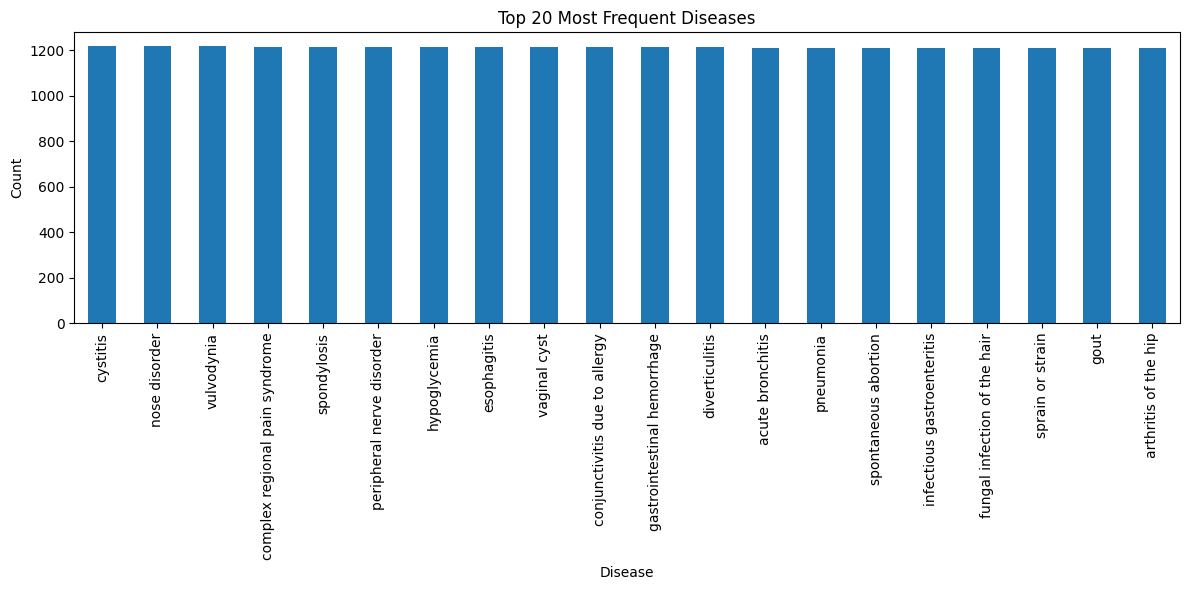

In [15]:
plt.figure(figsize=(12, 6))

df['diseases'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Frequent Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [16]:
df["diseases"]

0                 panic disorder
1                 panic disorder
2                 panic disorder
3                 panic disorder
4                 panic disorder
                   ...          
189642    open wound of the nose
189643    open wound of the nose
189644    open wound of the nose
189645    open wound of the nose
189646    open wound of the nose
Name: diseases, Length: 189647, dtype: object

### Text Column Encoding.

In [7]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['diseases'])

In [18]:
# Check result
print(df[['diseases', 'label']].head(10))

         diseases  label
0  panic disorder    531
1  panic disorder    531
2  panic disorder    531
3  panic disorder    531
4  panic disorder    531
5  panic disorder    531
6  panic disorder    531
7  panic disorder    531
8  panic disorder    531
9  panic disorder    531


## Remove the diseases column

In [8]:
df = df.drop(["diseases"], axis=1).copy()
df.head()

,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness,label
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,531
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,531
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,531
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,531
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,531


# Split features and target

In [9]:
X = df.drop(["label"], axis=1)
y = df["label"]

In [21]:
X.shape, y.shape

((189647, 377), (189647,))

In [22]:
X.head()

,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X.columns

Index(['anxiety_and_nervousness', 'depression', 'shortness_of_breath',
       'depressive_or_psychotic_symptoms', 'sharp_chest_pain', 'dizziness',
       'insomnia', 'abnormal_involuntary_movements', 'chest_tightness',
       'palpitations',
       ...
       'stuttering_or_stammering', 'problems_with_orgasm', 'nose_deformity',
       'lump_over_jaw', 'sore_in_nose', 'hip_weakness', 'back_swelling',
       'ankle_stiffness_or_tightness', 'ankle_weakness', 'neck_weakness'],
      dtype='object', length=377)

In [ ]:
# Get all symptoms as a list
all_symptoms = X.columns.tolist()
print(f"Total symptoms: {len(all_symptoms)}")
print("\nAll symptoms:")
for i, symptom in enumerate(all_symptoms):
    print(f"{i+1:3d}. {symptom}")

Total symptoms: 377

All symptoms:
  1. anxiety_and_nervousness
  2. depression
  3. shortness_of_breath
  4. depressive_or_psychotic_symptoms
  5. sharp_chest_pain
  6. dizziness
  7. insomnia
  8. abnormal_involuntary_movements
  9. chest_tightness
 10. palpitations
 11. irregular_heartbeat
 12. breathing_fast
 13. hoarse_voice
 14. sore_throat
 15. difficulty_speaking
 16. cough
 17. nasal_congestion
 18. throat_swelling
 19. diminished_hearing
 20. lump_in_throat
 21. throat_feels_tight
 22. difficulty_in_swallowing
 23. skin_swelling
 24. retention_of_urine
 25. groin_mass
 26. leg_pain
 27. hip_pain
 28. suprapubic_pain
 29. blood_in_stool
 30. lack_of_growth
 31. emotional_symptoms
 32. elbow_weakness
 33. back_weakness
 34. pus_in_sputum
 35. symptoms_of_the_scrotum_and_testes
 36. swelling_of_scrotum
 37. pain_in_testicles
 38. flatulence
 39. pus_draining_from_ear
 40. jaundice
 41. mass_in_scrotum
 42. white_discharge_from_eye
 43. irritable_infant
 44. abusing_alcohol
 45. 

: 

In [ ]:
# Group symptoms by categories for better organization
import re

def categorize_symptoms(symptoms):
    categories = {
        'Respiratory': [],
        'Cardiovascular': [],
        'Gastrointestinal': [],
        'Neurological': [],
        'Musculoskeletal': [],
        'Dermatological': [],
        'Psychological': [],
        'Genitourinary': [],
        'ENT': [],  # Ear, Nose, Throat
        'Ophthalmological': [],
        'General': []
    }
    
    # Keywords for each category
    respiratory_keywords = ['breath', 'cough', 'wheez', 'lung', 'chest', 'respiratory', 'snor', 'throat']
    cardiovascular_keywords = ['heart', 'chest_pain', 'palpitation', 'circulation', 'blood', 'cardiac']
    gastrointestinal_keywords = ['stomach', 'nausea', 'vomit', 'diarrhea', 'constip', 'abdomen', 'bowel', 'digest', 'intestin', 'rectal', 'stool']
    neurological_keywords = ['head', 'dizz', 'seizure', 'tremor', 'paralys', 'numb', 'memory', 'confusion', 'conscious', 'neurolog', 'brain', 'nerve']
    musculoskeletal_keywords = ['joint', 'muscle', 'bone', 'back', 'neck', 'shoulder', 'arm', 'leg', 'knee', 'ankle', 'hip', 'stiff', 'weakness', 'pain_in']
    dermatological_keywords = ['skin', 'rash', 'itch', 'hair', 'nail', 'lesion', 'spot', 'lump', 'swelling']
    psychological_keywords = ['anxiety', 'depression', 'psychotic', 'mood', 'behavior', 'stress', 'panic']
    genitourinary_keywords = ['urin', 'bladder', 'kidney', 'genital', 'sexual', 'orgasm', 'erectile']
    ent_keywords = ['ear', 'nose', 'throat', 'hearing', 'voice', 'nasal', 'sinus']
    ophthalmological_keywords = ['eye', 'vision', 'sight', 'blind']
    
    for symptom in symptoms:
        symptom_lower = symptom.lower()
        categorized = False
        
        # Check each category
        if any(keyword in symptom_lower for keyword in respiratory_keywords):
            categories['Respiratory'].append(symptom)
            categorized = True
        elif any(keyword in symptom_lower for keyword in cardiovascular_keywords):
            categories['Cardiovascular'].append(symptom)
            categorized = True
        elif any(keyword in symptom_lower for keyword in gastrointestinal_keywords):
            categories['Gastrointestinal'].append(symptom)
            categorized = True
        elif any(keyword in symptom_lower for keyword in neurological_keywords):
            categories['Neurological'].append(symptom)
            categorized = True
        elif any(keyword in symptom_lower for keyword in musculoskeletal_keywords):
            categories['Musculoskeletal'].append(symptom)
            categorized = True
        elif any(keyword in symptom_lower for keyword in dermatological_keywords):
            categories['Dermatological'].append(symptom)
            categorized = True
        elif any(keyword in symptom_lower for keyword in psychological_keywords):
            categories['Psychological'].append(symptom)
            categorized = True
        elif any(keyword in symptom_lower for keyword in genitourinary_keywords):
            categories['Genitourinary'].append(symptom)
            categorized = True
        elif any(keyword in symptom_lower for keyword in ent_keywords):
            categories['ENT'].append(symptom)
            categorized = True
        elif any(keyword in symptom_lower for keyword in ophthalmological_keywords):
            categories['Ophthalmological'].append(symptom)
            categorized = True
        
        if not categorized:
            categories['General'].append(symptom)
    
    return categories

# Categorize all symptoms
symptom_categories = categorize_symptoms(all_symptoms)

# Print categories with counts
print("Symptom Categories:")
print("=" * 50)
for category, symptoms in symptom_categories.items():
    print(f"\n{category}: ({len(symptoms)} symptoms)")
    for i, symptom in enumerate(sorted(symptoms), 1):
        print(f"  {i:2d}. {symptom}")
        
print(f"\nTotal symptoms across all categories: {sum(len(symptoms) for symptoms in symptom_categories.values())}")

In [24]:
joblib.dump(list(X.columns), "symptom_columns.pkl")

['symptom_columns.pkl']

In [25]:
# Split the dataset to train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [26]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((151717, 377), (37930, 377), (37930,), (151717,))

# MODEL CREATION.

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### PREDICTION AND SCORING

In [28]:
y_pred = lr.predict(x_test)

In [29]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.834748220406011
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.87      0.96      0.91        49
           2       0.79      0.76      0.77        29
           3       0.00      0.00      0.00         1
           4       0.63      0.88      0.73        25
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.82      0.74      0.78        82
           9       0.95      0.70      0.80       155
          10       0.89      0.93      0.91       238
          11       0.90      0.64      0.74       247
          12       0.72      0.82      0.77       166
          14       0.27      0.20      0.23        30
          15       0.98      0.92      0.95       168
          16       0.69      0.83      0.75       108
          17       0.88      0.88

## NEURAL NETWORK MODEL.

In [30]:
model = Sequential([
    Dense(512, input_shape=(X.shape[1],), activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])

In [31]:
# Compile the model and show a summary
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               193536    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 773)               198661    
                                                                 
Total params: 523525 (2.00 MB)
Trainable params: 523525 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit and Train the Model

In [32]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
1518/1518 [==============================] - 11s 6ms/step - loss: 1.0682 - accuracy: 0.7382 - val_loss: 0.5327 - val_accuracy: 0.8161
Epoch 2/20
1518/1518 [==============================] - 10s 7ms/step - loss: 0.4784 - accuracy: 0.8221 - val_loss: 0.4835 - val_accuracy: 0.8208
Epoch 3/20
1518/1518 [==============================] - 9s 6ms/step - loss: 0.4429 - accuracy: 0.8286 - val_loss: 0.4821 - val_accuracy: 0.8182
Epoch 4/20
1518/1518 [==============================] - 9s 6ms/step - loss: 0.4249 - accuracy: 0.8320 - val_loss: 0.4605 - val_accuracy: 0.8206
Epoch 5/20
1518/1518 [==============================] - 9s 6ms/step - loss: 0.4099 - accuracy: 0.8348 - val_loss: 0.4618 - val_accuracy: 0.8188
Epoch 6/20
1518/1518 [==============================] - 9s 6ms/step - loss: 0.3997 - accuracy: 0.8374 - val_loss: 0.4563 - val_accuracy: 0.8230
Epoch 7/20
1518/1518 [==============================] - 9s 6ms/step - loss: 0.3911 - accuracy: 0.8390 - val_loss: 0.4563 - val_accurac

In [33]:
# Evaluate the model after training.
loss, acc = model.evaluate(x_test, y_test)
print(f"MLP Model Accuracy: {acc:.4f}")

1186/1186 [==============================] - 2s 2ms/step - loss: 0.5051 - accuracy: 0.8090
MLP Model Accuracy: 0.8090


# Logistic Regression VS Neural Network Model Comparison.

In [34]:
lr_preds = lr.predict(x_test)
nn_preds = np.argmax(model.predict(x_test), axis=1)

# Accuracy scores
lr_acc = accuracy_score(y_test, lr_preds)
nn_acc = accuracy_score(y_test, nn_preds)

print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Neural Network Accuracy: {nn_acc:.4f}")

1186/1186 [==============================] - 2s 1ms/step
Logistic Regression Accuracy: 0.8347
Neural Network Accuracy: 0.8090


# Models Performance Plot.

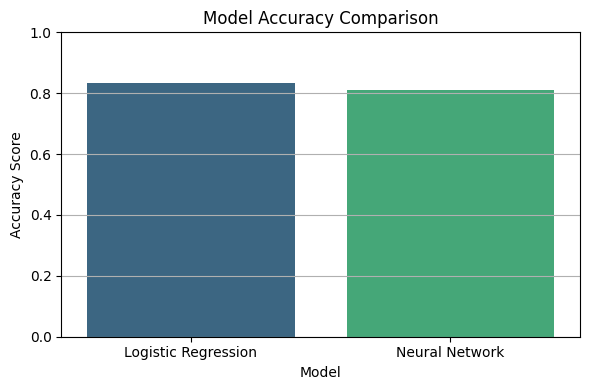

In [35]:
# Create DataFrame for plotting
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Neural Network'],
    'Accuracy': [lr_acc, nn_acc]
})

# Plot
plt.figure(figsize=(6, 4))
sn.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.ylim(0, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')

plt.grid(axis='y')
plt.tight_layout()

plt.show()

## See The Wrong Predictions From The Two Models

In [36]:
# Find incorrect predictions for each model
lr_incorrect = np.where(y_test != lr_preds)[0]  # Indices of wrong predictions for Logistic Regression
nn_incorrect = np.where(y_test != nn_preds)[0]  # Indices of wrong predictions for Neural Network

In [37]:
y_test.shape, nn_preds.shape, lr_preds.shape, type(y_test), type(nn_preds), type(lr_preds), lr_incorrect.shape, nn_incorrect.shape

((37930,),
 (37930,),
 (37930,),
 pandas.core.series.Series,
 numpy.ndarray,
 numpy.ndarray,
 (6268,),
 (7243,))

In [38]:
lr_preds[lr_incorrect], nn_preds[nn_incorrect]

(array([323,  10, 743, ..., 314, 745, 169]),
 array([286,  10, 249, ..., 156, 138, 169], dtype=int64))

### Plot the wrong predictions for each of the models.

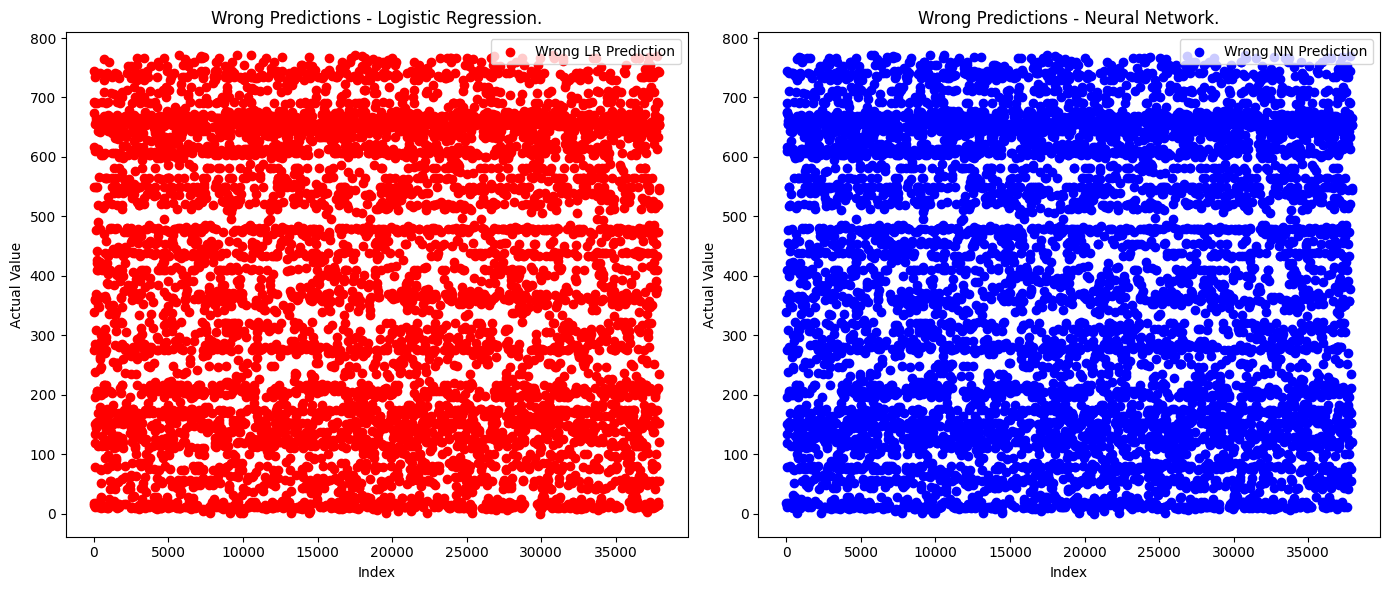

In [39]:
# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot wrong predictions for Logistic Regression
axes[0].scatter(np.arange(len(y_test))[lr_incorrect], y_test.iloc[lr_incorrect], color='r', label='Wrong LR Prediction')
axes[0].set_title('Wrong Predictions - Logistic Regression.')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Actual Value')
axes[0].legend()

# Plot wrong predictions for Neural Network
axes[1].scatter(np.arange(len(y_test))[nn_incorrect], y_test.iloc[nn_incorrect], color='b', label='Wrong NN Prediction')
axes[1].set_title('Wrong Predictions - Neural Network.')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Actual Value')
axes[1].legend()

# Display the plot
plt.tight_layout()
plt.show()

In [40]:
# Create DataFrame for Logistic Regression wrong predictions
wrong_lr_preds = pd.DataFrame({
    'Index': np.arange(len(y_test))[lr_incorrect],  # Index of wrong predictions
    'True Value': y_test.iloc[lr_incorrect],       # True values
    'Logistic Prediction': lr_preds[lr_incorrect], # Predictions from Logistic Regression
})

# Create DataFrame for Neural Network wrong predictions
wrong_nn_preds = pd.DataFrame({
    'Index': np.arange(len(y_test))[nn_incorrect],  # Index of wrong predictions
    'True Value': y_test.iloc[nn_incorrect],       # True values
    'NN Prediction': nn_preds[nn_incorrect], # Predictions from Neural Network
})

In [41]:
wrong_lr_preds.head()

,Index,True Value,Logistic Prediction
155695,1,339,323
117249,6,18,10
2113,9,745,743
170401,10,550,477
118253,16,692,672


In [42]:
wrong_nn_preds.head()

,Index,True Value,NN Prediction
155695,1,339,286
117249,6,18,10
172119,7,675,249
2113,9,745,743
174148,19,674,235


In [43]:
# See the corresponding feature rows (from X_test) for index 1 and 6
print("\nFeature Values for index 1 and 6 from X_test:")
selected_rows = x_test.iloc[[6, 9]]

selected_rows


Feature Values for index 1 and 6 from X_test:


,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
117249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Predicting New Patient Data.

In [44]:
def predict_disease(symptom_vector):
    """
    Utility function to aid in the prediction of a disease from new symptoms.
    """
    symptom_vector = np.array(symptom_vector).reshape(1, -1)

    # Logistic Regression prediction
    lr_pred = lr.predict(symptom_vector)[0]
    lr_label = le.inverse_transform([lr_pred])[0]

    # Neural Network prediction
    nn_pred = model.predict(symptom_vector)
    nn_pred_class = np.argmax(nn_pred, axis=1)[0]
    nn_label = le.inverse_transform([nn_pred_class])[0]

    return lr_label, nn_label

### Prediction Simulation.

In [45]:
test_vector = X.iloc[0].values  # simulate from existing row

# Reshape to 2D for prediction
test_vector_2d = test_vector.reshape(1, -1)

lr_result, nn_result = predict_disease(test_vector_2d)
print("Logistic Regression Prediction:", lr_result)
print("MLP Prediction:", nn_result)

1/1 [==============================] - 0s 16ms/step
Logistic Regression Prediction: panic disorder
MLP Prediction: panic disorder


## Create Fake Data To Test The Simulation Logic

In [46]:
# Get number of symptoms from your training set
num_symptoms = X.shape[1]  # same structure as your input

# Create a few random symptom vectors
dummy_data = pd.DataFrame(np.random.randint(0, 2, size=(5, num_symptoms)), columns=X.columns)
print("Dummy Symptom Data:")
dummy_data

Dummy Symptom Data:


,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
0,0,1,0,0,0,0,0,1,1,1,...,0,0,1,1,1,0,1,0,1,1
1,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,1,1,1,0,1,0
2,0,0,0,1,1,1,0,0,1,0,...,1,0,0,1,0,0,1,1,1,1
3,1,1,1,0,1,0,0,1,0,0,...,1,0,1,0,1,1,1,0,1,0
4,1,1,0,1,1,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,1


In [47]:
# Predictions of the dummy dataset.
for i, row in dummy_data.iterrows():
    lr_result, nn_result = predict_disease(row.values)
    print(f"\nPatient {i+1}")
    print("Symptoms:", row.values)
    print()
    print("Logistic Regression Prediction:", lr_result)
    print("MLP Neural Network Prediction:", nn_result)

1/1 [==============================] - 0s 39ms/step

Patient 1
Symptoms: [0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1
 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0
 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0
 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 1 1]

Logistic Regression Prediction: prostatitis
MLP Neural Network Prediction: hypoglycemia
1/1 [==============================] - 0s 15ms/step

Patient 2
Symptoms:

## Above Output Analysis.
- The two models disagree on the possible disease based on the given symptoms.
- Let's cast some light on this situation.

In [48]:
def print_patient_info(index, symptom_vector):
    """
    Utility function to print out the patient information in text and not binary like above.
    """
    symptoms_present = [X.columns[i] for i, val in enumerate(symptom_vector) if val == 1]
    print(f"\nPatient {index + 1}")
    print("Symptoms Present:", symptoms_present if symptoms_present else "None")
    print()
    print("########################PATIENT PREDICTIONS##########################")

In [49]:
def predict_and_explain(index, symptom_vector):
    """
    Utility function to predict the most likely disease and the symptoms shown by the patient.
    """
    print_patient_info(index, symptom_vector)

    # Get model predictions
    lr_label, nn_label = predict_disease(symptom_vector)

    print(f"Logistic Regression Prediction: {lr_label}")
    print(f"Neural Network Prediction: {nn_label}")

    # Optional: Show confidence
    nn_confidence = model.predict(symptom_vector.reshape(1, -1))
    nn_class = np.argmax(nn_confidence)
    print(f"Neural Net Confidence for {nn_label}: {nn_confidence[0][nn_class]:.2f}")

In [50]:
# Show the predictions and symptoms.
for idx, row in dummy_data.iterrows():
    predict_and_explain(idx, row.values)


Patient 1
Symptoms Present: ['depression', 'abnormal_involuntary_movements', 'chest_tightness', 'palpitations', 'hoarse_voice', 'difficulty_speaking', 'nasal_congestion', 'throat_swelling', 'diminished_hearing', 'lump_in_throat', 'retention_of_urine', 'leg_pain', 'hip_pain', 'lack_of_growth', 'swelling_of_scrotum', 'pain_in_testicles', 'mass_in_scrotum', 'irritable_infant', 'abusing_alcohol', 'fainting', 'sharp_abdominal_pain', 'feeling_ill', 'nausea', 'pain_during_intercourse', 'frequent_urination', 'lower_abdominal_pain', 'blood_in_urine', 'intermenstrual_bleeding', 'hand_or_finger_pain', 'arm_pain', 'wrist_swelling', 'hand_or_finger_stiffness_or_tightness', 'wrist_stiffness_or_tightness', 'lip_swelling', 'toothache', 'skin_lesion', 'dry_lips', 'skin_growth', 'double_vision', 'pain_in_eye', 'eye_moves_abnormally', 'abnormal_movement_of_eyelid', 'foreign_body_sensation_in_eye', 'back_pain', 'neck_pain', 'low_back_pain', 'pain_during_pregnancy', 'impotence', 'vomiting_blood', 'regurgi

In [51]:
# Save Scaler (if used)
joblib.dump(le, 'encoder.pkl')

['encoder.pkl']

In [52]:
# Save Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')

# Save Neural Network model
joblib.dump(model, 'neural_network_model.pkl')

['neural_network_model.pkl']